In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io 
plt.style.use("science")
import cmcrameri.cm as cmcm

In [2]:
sumer_img = scipy.io.readsav("../save/sumer_merg.sav")["int_merg"]
sumer_img_log = np.log10(sumer_img)
sumer_img_log = np.nan_to_num(sumer_img_log,nan=-np.inf)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [3]:
sumer_img.shape

(300, 4096)

/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


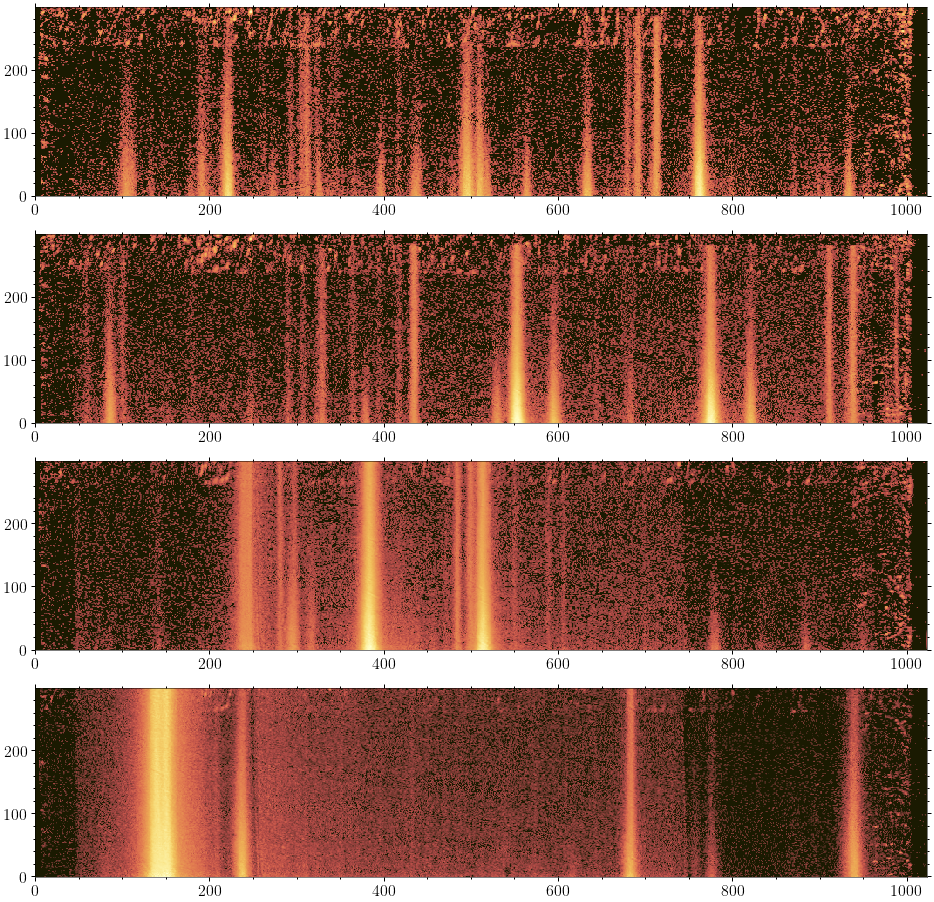

In [4]:
fig, axes = plt.subplots(4,1,figsize=(16,16))
axes[0].pcolormesh(np.arange(1024),np.arange(299,-1,-1),sumer_img_log[:,:1024],
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)
axes[1].pcolormesh(np.arange(1024),np.arange(299,-1,-1),sumer_img_log[:,1024:2048],
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)
axes[2].pcolormesh(np.arange(1024),np.arange(299,-1,-1),sumer_img_log[:,2048:3072],
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)
axes[3].pcolormesh(np.arange(1024),np.arange(299,-1,-1),sumer_img_log[:,3072:4096],
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-4)

for ax_ in axes:
    ax_.tick_params(which="major",width=1,length=4,direction="out")
    ax_.tick_params(which="minor",width=1,length=2,direction="out")
    ax_.tick_params(labelsize=16)

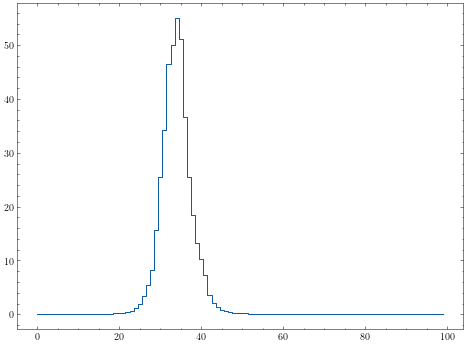

In [5]:
OVI_1032_window = sumer_img[:,2048+350:2048+450] 
fig, ax = plt.subplots(figsize=(8,6))
ax.step(np.arange(OVI_1032_window.shape[1]),np.sum(OVI_1032_window[-15:,:],axis=0),where="mid")

In [6]:
sumer_ycen = 1119.81
sumer_ycoord = np.linspace(sumer_ycen-299.2/2,sumer_ycen+299.2/2,300)

OVI_1032_int = np.sum(OVI_1032_window[:,:],axis=1)- \
            OVI_1032_window.shape[1]*np.average(OVI_1032_window[:,-40:],axis=1)

In [7]:
eis_data_set = scipy.io.readsav("../save/new_lvl1_offset_limb_1116_northpole_tilt_cor_l1_20071116_07262.sav",verbose=False)
eis_wvl =  eis_data_set["wvl"]
eis_img = eis_data_set["new_data_offset"]

In [8]:
np.argmin(np.abs(eis_wvl-184.1))

798

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


(900.0, 1100.0)

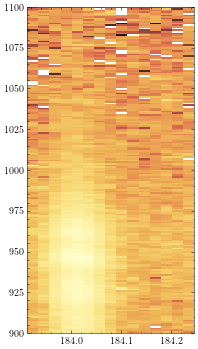

In [9]:
OVI_184_window_wvl = eis_wvl[790:805]
OVI_184_window = np.average(eis_img[:,:,790:805],axis=0)

eis_ycen = 865.277 
ycoord_eis_new = np.linspace(eis_ycen-257.5,eis_ycen-257.5+533,534)-15

fig, ax = plt.subplots(figsize=(3,6))
ax.pcolormesh(OVI_184_window_wvl,ycoord_eis_new,np.log10(OVI_184_window),shading="auto",
             cmap = cmcm.lajolla_r)
ax.set_ylim(900,1100)

In [10]:
np.argmin(np.abs(ycoord_eis_new-950))

357

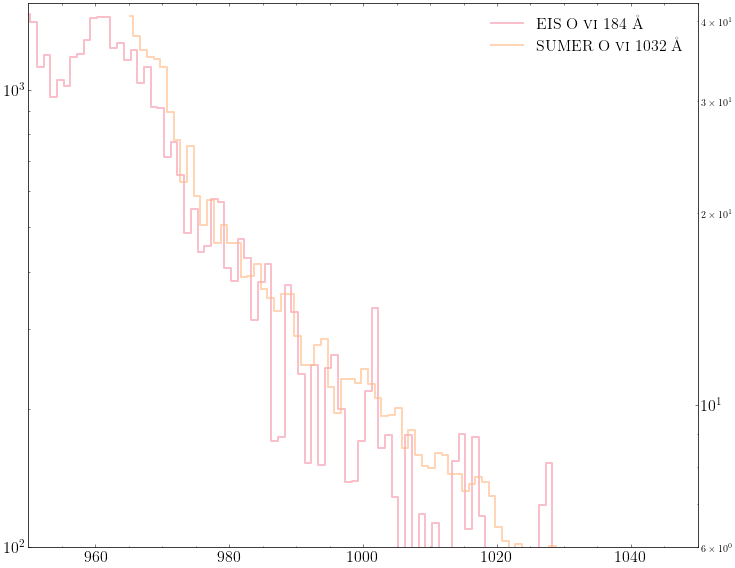

In [11]:
OVI_184_int = np.sum(OVI_184_window[357:,:],axis=1)- \
            len(OVI_184_window_wvl)*np.average(OVI_184_window[357:,-4:],axis=1)

fig, ax_eis = plt.subplots(figsize=(12,10))
ln1, = ax_eis.step(ycoord_eis_new[357:],OVI_184_int,where="mid",color="#F596AA",lw=2,alpha=0.6,
           label=r"EIS O \textsc{vi} 184 \mbox{\AA}")

ax_sumer = ax_eis.twinx()
ln2, = ax_sumer.step(np.flip(sumer_ycoord)-5,OVI_1032_int,where="mid",color="#FFBA84",lw=2,alpha=0.6,
             label=r"SUMER O \textsc{vi} 1032 \mbox{\AA}")

#ax_eis.set_ylim(bottom=-10)
#ax_sumer.set_ylim(bottom=0)
leg = [ln1,ln2]
ax_eis.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'upper right',fontsize = 16,frameon=False)

ax_eis.set_ylim(bottom=100)
ax_sumer.set_ylim(bottom=6)
for ax_ in (ax_sumer,ax_eis):
    ax_.tick_params(labelsize=16)
    ax_.set_yscale("log")
    ax_.set_xlim(950,1050)

In [17]:
print((sumer_ycoord - 5)[0],(sumer_ycoord - 5)[29],(sumer_ycoord - 5)[30])

965.2099999999999 994.229397993311 995.230066889632


In [12]:
(sumer_ycoord - 5)[0]/960

1.0054270833333332

In [13]:
(sumer_ycoord)[0]/960

1.0106354166666667

In [14]:
(sumer_ycoord - 5)[30]/960

1.0366979863433667

In [15]:
(sumer_ycoord)[30]/960

1.0419063196767

In [23]:
eis_index_start = np.argmin(np.abs(ycoord_eis_new-(sumer_ycoord[0] - 5)))
eis_index_end = np.argmin(np.abs(ycoord_eis_new-(sumer_ycoord[30] - 5)))
print(eis_index_start,ycoord_eis_new[eis_index_start])
print(eis_index_end,ycoord_eis_new[eis_index_end])

372 964.777
402 994.777
